In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [3]:
len(XT)

25000

In [4]:
len(Xt)

25000

In [5]:
word_idx = imdb.get_word_index()

In [6]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [7]:
actual_review = ''.join([idx_word.get(idx-3,'/') for idx in XT[0]])

In [8]:
print(actual_review)

/thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert/isanamazingactorandnowthesamebeingdirector/fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor/andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso/tothetwolittleboy'sthatplayedthe/ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe/listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [9]:
def vectorize_sentence(sentences, dim=10000):
    outputs = np.zeros((len(sentences), dim))
    for i, idx in enumerate(sentences):
        outputs[i, idx] = 1
    return outputs

In [10]:
X_train = vectorize_sentence(XT)
X_test = vectorize_sentence(Xt)

In [11]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [13]:
Y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
from keras import models
from keras.layers import Dense

In [15]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\hp\OneDrive\Desktop\machinelearning\sentiment_analysis_nn\tf_env_310\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 16)            │      160,016 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 16)            │          272 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 1)             │           17 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Training ,Validation and Early Stopping

In [18]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]
Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [25]:
hist = model.fit(X_train_new,Y_train_new,epochs=20,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.8664 - val_loss: 1.0205
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 6.1052e-04 - val_accuracy: 0.8654 - val_loss: 1.0407
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9998 - loss: 9.9631e-04 - val_accuracy: 0.8602 - val_loss: 1.0942
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 7.3122e-04 - val_accuracy: 0.8646 - val_loss: 1.0784
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 4.5043e-04 - val_accuracy: 0.8618 - val_loss: 1.1113
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 5.2182e-04 - val_accuracy: 0.8646 - val_loss: 1.1129
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 3.5460e-04 - val_accuracy: 0.8648 - val_loss: 1.1279
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9991 - loss: 0.0024 - 

In [26]:
h = hist.history

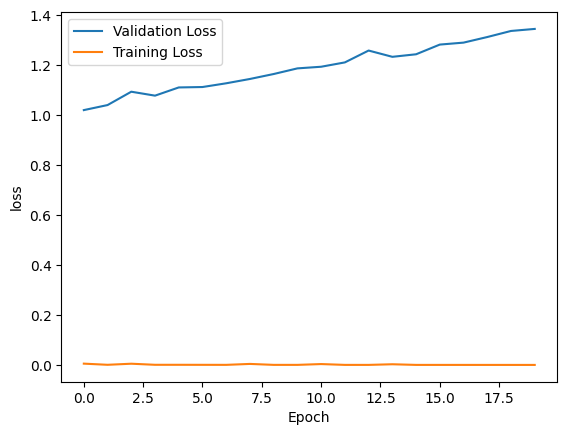

In [27]:
import matplotlib.pyplot as plt
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

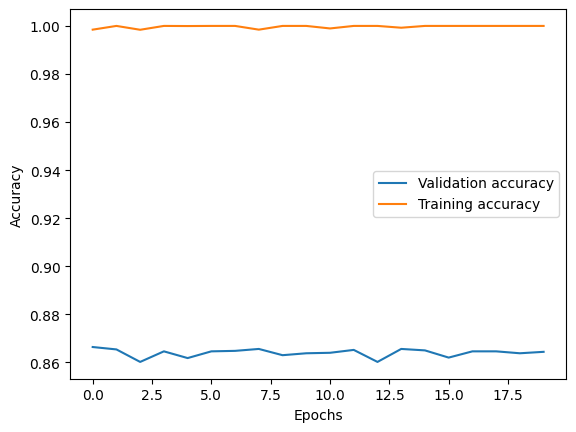

In [28]:
plt.plot(h['val_accuracy'],label='Validation accuracy')
plt.plot(h['accuracy'],label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test,Y_test)[1]

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8475 - loss: 1.5041


0.8507999777793884

In [30]:
model.evaluate(X_train,Y_train)[1]

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9298 - loss: 0.6968


0.9728800058364868

In [31]:
model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[4.2429143e-05],
       [1.0000000e+00],
       [4.6548276e-04],
       ...,
       [1.2135579e-05],
       [7.5336638e-06],
       [9.9999219e-01]], dtype=float32)